# Global Energy Consumption Analytics : Self project July-22
### Introduction:
In this project I have used the global energy consumption source data from web and applied various analytical techniques and tools to analysed the impact of covid-19 and economic crises 2009-10 on the energy consumption trend. Also I have analysed energy generation contribution of each renewable sources.
Skills used:
Python coding with libraries- Numpy, Pandas, Matplotlib, Seaborn, sklearn.
Statsmodel- Time series analysis
Principal Component Analysis, StandardScaler

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from statsmodels.tsa import seasonal
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## 1. Continent Energy Consumption

In [2]:
Engy_consuptn_Continent=pd.read_csv('Continent_Consumption_TWH-Copy1.csv')
Engy_consuptn_Continent

,Year,World,OECD,BRICS,Europe,North America,Latin America,Asia,Pacific,Africa,Middle-East,CIS
0,1990,101855.54,52602.49,26621.07,20654.88,24667.23,5373.06,24574.19,1197.89,4407.77,2581.86,16049.40
1,1991,102483.56,53207.25,26434.99,20631.62,24841.68,5500.99,24783.53,1186.26,4535.70,2744.68,15898.21
2,1992,102588.23,53788.75,25993.05,20189.68,25341.77,5628.92,25690.67,1209.52,4582.22,3081.95,14339.79
3,1993,103646.56,54614.48,26283.80,20189.68,25830.23,5675.44,26876.93,1267.67,4721.78,3349.44,13246.57
4,1994,104449.03,55579.77,25993.05,20085.01,26365.21,5989.45,28098.08,1279.30,4803.19,3640.19,11606.74
5,1995,107112.30,56754.40,26946.71,20713.03,26714.11,6024.34,29761.17,1290.93,5000.90,3744.86,11188.06
6,1996,109763.94,58417.49,27481.69,21445.72,27295.61,6303.46,30772.98,1372.34,5152.09,3814.64,10850.79
7,1997,110903.68,59022.25,27446.80,21341.05,27574.73,6570.95,31435.89,1407.23,5280.02,4058.87,10373.96
8,1998,111450.29,59219.96,27528.21,21503.87,27772.44,6803.55,31331.22,1442.12,5431.21,4082.13,10152.99
9,1999,113974.00,60301.55,28319.05,21306.16,28528.39,6989.63,32412.81,1477.01,5559.14,4244.95,10373.96


In [3]:
Engy_consuptn_Continent.head()

,Year,World,OECD,BRICS,Europe,North America,Latin America,Asia,Pacific,Africa,Middle-East,CIS
0,1990,101855.54,52602.49,26621.07,20654.88,24667.23,5373.06,24574.19,1197.89,4407.77,2581.86,16049.40
1,1991,102483.56,53207.25,26434.99,20631.62,24841.68,5500.99,24783.53,1186.26,4535.70,2744.68,15898.21
2,1992,102588.23,53788.75,25993.05,20189.68,25341.77,5628.92,25690.67,1209.52,4582.22,3081.95,14339.79
3,1993,103646.56,54614.48,26283.80,20189.68,25830.23,5675.44,26876.93,1267.67,4721.78,3349.44,13246.57
4,1994,104449.03,55579.77,25993.05,20085.01,26365.21,5989.45,28098.08,1279.30,4803.19,3640.19,11606.74


In [4]:
Engy_consuptn_Continent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           31 non-null     int64  
 1   World          31 non-null     float64
 2   OECD           31 non-null     float64
 3   BRICS          31 non-null     float64
 4   Europe         31 non-null     float64
 5   North America  31 non-null     float64
 6   Latin America  31 non-null     float64
 7   Asia           31 non-null     float64
 8   Pacific        31 non-null     float64
 9   Africa         31 non-null     float64
 10  Middle-East    31 non-null     float64
 11  CIS            31 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 3.0 KB


In [5]:
Continent_Name=list(set(Engy_consuptn_Continent.columns)-set(['World','OECD','CIS','Middle-East',
                                                           'BRICS', 'Year']))
organization_name = ['OECD','CIS','Middle-East','BRICS']

## 2. World Energy Consumption

In [6]:
Engy_consuptn_Continent.set_index('Year',inplace=True)
Engy_consuptn_Continent

,World,OECD,BRICS,Europe,North America,Latin America,Asia,Pacific,Africa,Middle-East,CIS
Year,,,,,,,,,,,
1990,101855.54,52602.49,26621.07,20654.88,24667.23,5373.06,24574.19,1197.89,4407.77,2581.86,16049.40
1991,102483.56,53207.25,26434.99,20631.62,24841.68,5500.99,24783.53,1186.26,4535.70,2744.68,15898.21
1992,102588.23,53788.75,25993.05,20189.68,25341.77,5628.92,25690.67,1209.52,4582.22,3081.95,14339.79
1993,103646.56,54614.48,26283.80,20189.68,25830.23,5675.44,26876.93,1267.67,4721.78,3349.44,13246.57
1994,104449.03,55579.77,25993.05,20085.01,26365.21,5989.45,28098.08,1279.30,4803.19,3640.19,11606.74
1995,107112.30,56754.40,26946.71,20713.03,26714.11,6024.34,29761.17,1290.93,5000.90,3744.86,11188.06
1996,109763.94,58417.49,27481.69,21445.72,27295.61,6303.46,30772.98,1372.34,5152.09,3814.64,10850.79
1997,110903.68,59022.25,27446.80,21341.05,27574.73,6570.95,31435.89,1407.23,5280.02,4058.87,10373.96
1998,111450.29,59219.96,27528.21,21503.87,27772.44,6803.55,31331.22,1442.12,5431.21,4082.13,10152.99


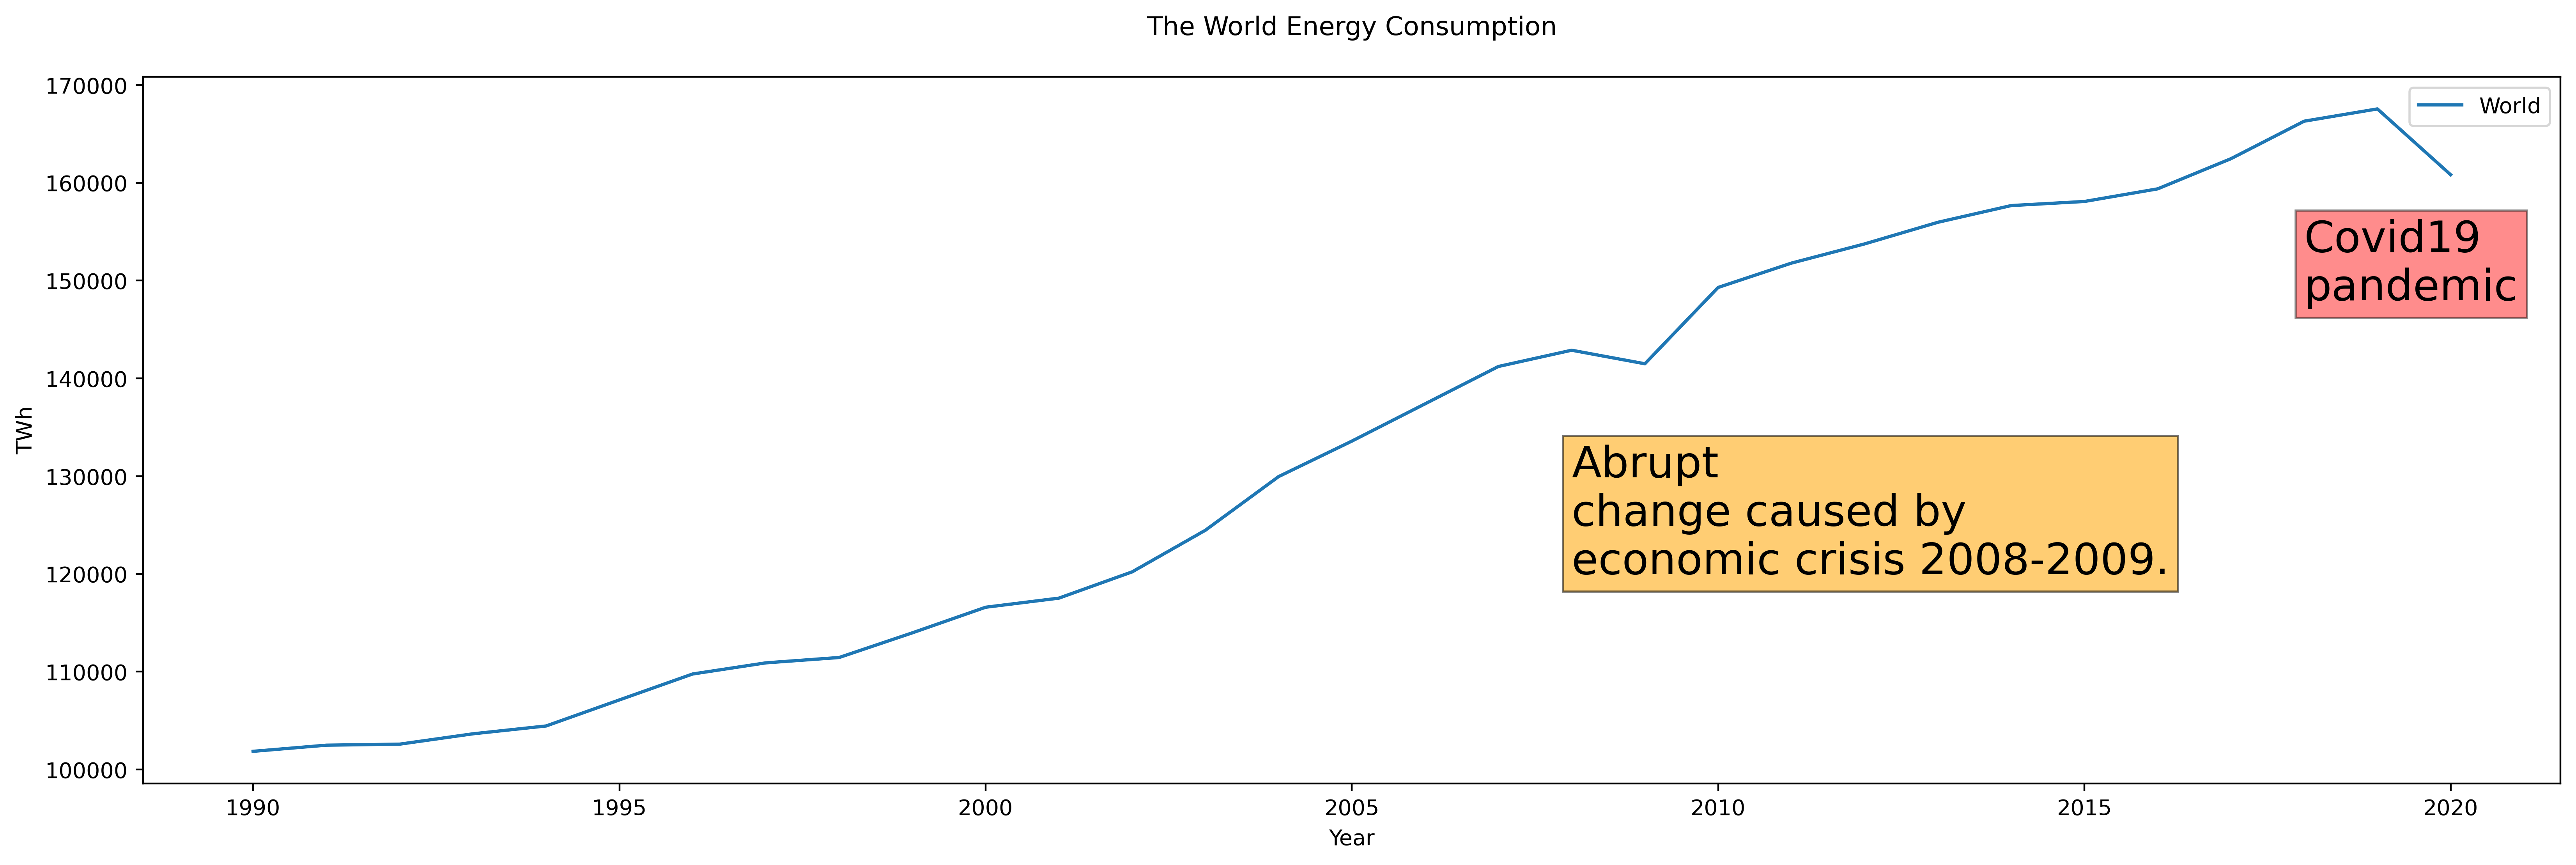

In [7]:
fig,WEC= plt.subplots(figsize=(20, 6),dpi=400)
sns.lineplot(data=Engy_consuptn_Continent,x="Year",y="World")
WEC.text(2008, 120000, 'Abrupt\nchange caused by\neconomic crisis 2008-2009.',fontsize=20, 
       bbox=dict(facecolor='orange', alpha=0.55))
WEC.text(2018, 148000, 'Covid19\npandemic',fontsize=20, bbox=dict(facecolor='red', alpha=0.45))
WEC.legend(["World"])
plt.ylabel("TWh")
plt.title('The World Energy Consumption\n')
plt.show()

##### As shown in above fig. the energy consumption increases YOY, but there are twoinstances where consumption suddenly impacted, one is Economic crises 2008-09 and other Covid-19.

In [8]:
World_ecchrate = Engy_consuptn_Continent.World.pct_change().mul(100)

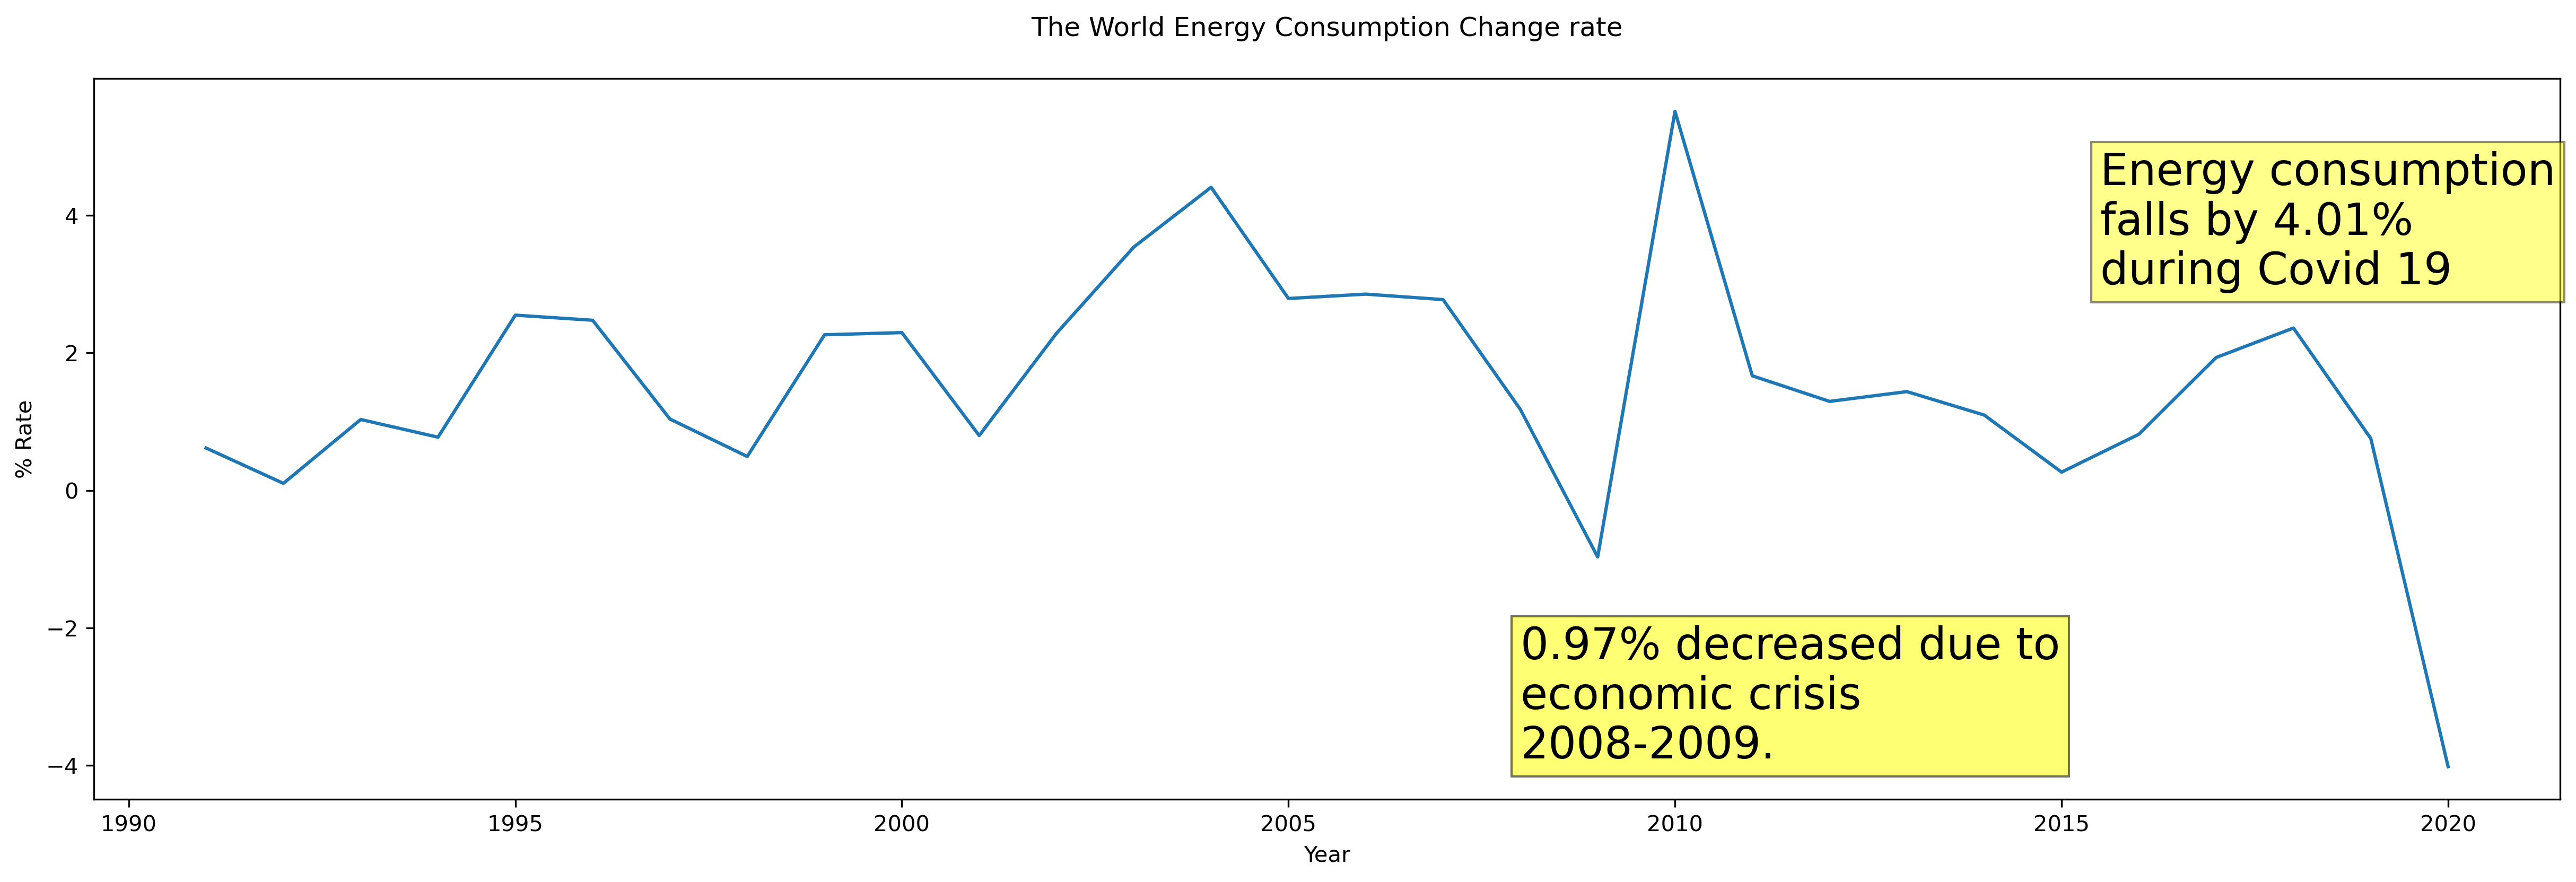

In [9]:
fig,WECchR= plt.subplots(figsize=(20, 6),dpi=300)
sns.lineplot(data=World_ecchrate)
WECchR.text(2008, -3.9, '0.97% decreased due to\neconomic crisis\n2008-2009.',fontsize=20,bbox=dict(facecolor='Yellow', alpha=0.55))
WECchR.text(2015.5, 3, 'Energy consumption\nfalls by 4.01%\nduring Covid 19',fontsize=20, bbox=dict(facecolor='Yellow', alpha=0.45))
#WECchR.legend(["World"])
plt.ylabel("% Rate")
plt.title('The World Energy Consumption Change rate\n')
plt.show()

# TSA Seasonal Decomposition

In [10]:
Decomp_WEC = seasonal.seasonal_decompose(Engy_consuptn_Continent.World, period=10)  #Seasonal decomposition of observed data
Decomp_WEC

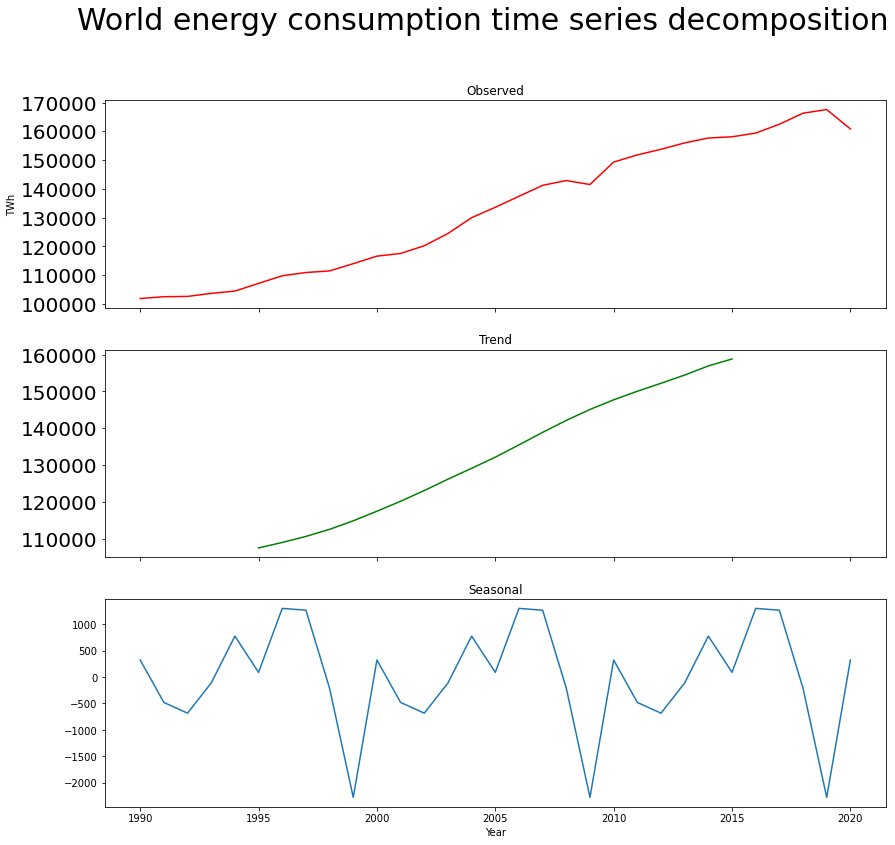

In [11]:
A, axc = plt.subplots(3, 1, figsize=(14, 13),sharex=True) 
plt.suptitle('World energy consumption time series decomposition', fontsize=30)
Decomp_WEC.observed.plot(ax=axc[0], title='Observed',color='red', fontsize=20)
Decomp_WEC.trend.plot(ax=axc[1], title='Trend',color='Green', fontsize=20)
Decomp_WEC.seasonal.plot(ax=axc[2], title='Seasonal')
axc[0].set_ylabel('TWh')
plt.show()

## 4. The impact of Covid19 pandemic on Energy consumption

In [12]:
Country_EC = pd.read_csv('Country_Consumption_TWH-Copy1.csv')
Country_EC.set_index('Year',inplace=True)

In [13]:
Country_EC.head()

,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,Poland,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
Year,,,,,,,,,,,,,,,,,,,,,
1990.0,874.0,1910.0,141.0,48.0,50.0,225.0,351.0,147.0,67.0,103.0,...,86.0,14.0,22.0,33.0,66.0,90.0,69.0,9.0,58.0,20.0
1991.0,848.0,1925.0,143.0,50.0,45.0,237.0,344.0,150.0,69.0,101.0,...,85.0,14.0,23.0,33.0,70.0,92.0,77.0,3.0,68.0,23.0
1992.0,877.0,1964.0,145.0,51.0,44.0,234.0,338.0,149.0,69.0,99.0,...,87.0,14.0,24.0,34.0,72.0,88.0,81.0,9.0,77.0,22.0
1993.0,929.0,1998.0,148.0,49.0,43.0,238.0,335.0,149.0,70.0,101.0,...,91.0,15.0,24.0,35.0,74.0,94.0,87.0,12.0,80.0,23.0
1994.0,973.0,2036.0,156.0,52.0,41.0,231.0,333.0,147.0,70.0,96.0,...,91.0,15.0,23.0,34.0,72.0,98.0,97.0,14.0,84.0,26.0


In [14]:
Country_EC.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 33 entries, 1990.0 to nan
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   China                 31 non-null     float64
 1   United States         31 non-null     float64
 2   Brazil                31 non-null     float64
 3   Belgium               31 non-null     float64
 4   Czechia               31 non-null     float64
 5   France                31 non-null     float64
 6   Germany               31 non-null     float64
 7   Italy                 31 non-null     float64
 8   Netherlands           31 non-null     float64
 9   Poland                31 non-null     float64
 10  Portugal              31 non-null     float64
 11  Romania               31 non-null     float64
 12  Spain                 31 non-null     float64
 13  Sweden                31 non-null     float64
 14  United Kingdom        31 non-null     float64
 15  Norway           

In [15]:
Covid_19_2020 = Country_EC[Country_EC.index.isin([2019, 2020])]
Eco_Crises_2008 = Country_EC[Country_EC.index.isin([2008, 2009])]

In [16]:
Covid_loss_2020 = Covid_19_2020.pct_change().mul(100).iloc[1]

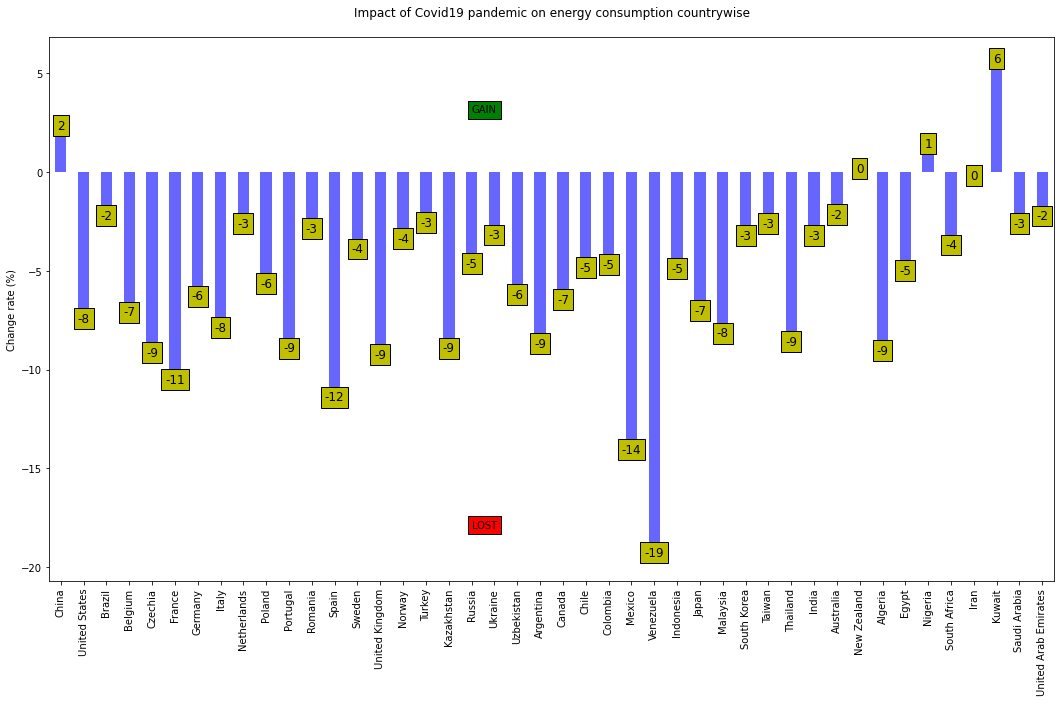

In [17]:
Cov = Covid_loss_2020.plot.bar(figsize=(18,10),color="b",alpha=0.6, title='Impact of Covid19 pandemic on energy consumption countrywise\n')
plt.ylabel('Change rate (%)')
for i, u in enumerate(Covid_loss_2020):
    Cov.text(i, u, str(round(u)), bbox=dict(facecolor='y'), ha='center', fontsize=12)
plt.text(18, -18, 'LOST', bbox=dict(facecolor='red'))
plt.text(18, 3, 'GAIN', bbox=dict(facecolor='g'))
plt.show()

In [18]:
Eco_Crises_loss_2009=Eco_Crises_2008.pct_change().mul(100).iloc[1]

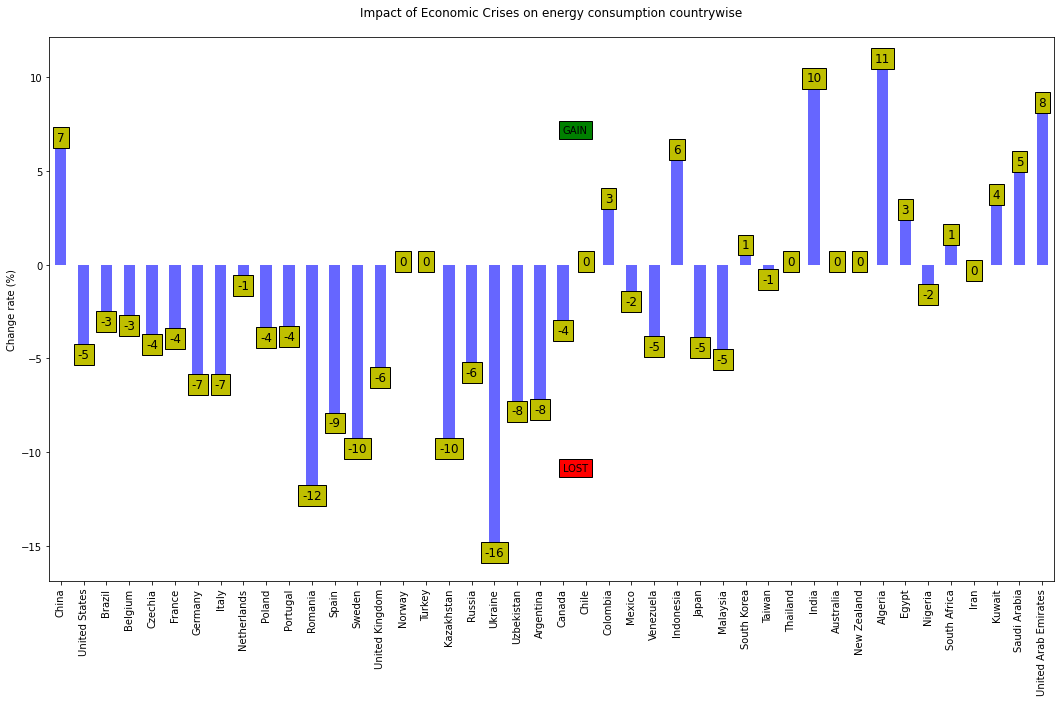

In [19]:
Cov = Eco_Crises_loss_2009.plot.bar(figsize=(18,10),color="b",alpha=0.6, title='Impact of Economic Crises on energy consumption countrywise\n')
plt.ylabel('Change rate (%)')
for i, u in enumerate(Eco_Crises_loss_2009):
    Cov.text(i, u, str(round(u)), bbox=dict(facecolor='y'), ha='center', fontsize=12)
plt.text(22, -11, 'LOST', bbox=dict(facecolor='red'))
plt.text(22, 7, 'GAIN', bbox=dict(facecolor='g'))
plt.show()

## 5. Renewable and Non-Renewable energy sector analysis

### 5.1. Non-renewable Energy Sources

In [20]:
Gen_non_renewable = pd.read_csv('nonRenewablesTotalPowerGeneration-Copy1.csv',header=0)
Gen_renewable = pd.read_csv('renewablesTotalPowerGeneration-Copy1.csv')

In [21]:
Gen_non_renewable.head()

,Mode of Generation,Contribution (TWh)
0,Coal,9863.33
1,Natural Gas,5882.82
2,Nuclear,2636.03
3,Oil,841.87
4,Waste,114.04


In [22]:
Gen_non_renewable.set_index('Mode of Generation', inplace=True) 

In [23]:
Gen_non_renewable.drop(labels='Total', inplace=True)

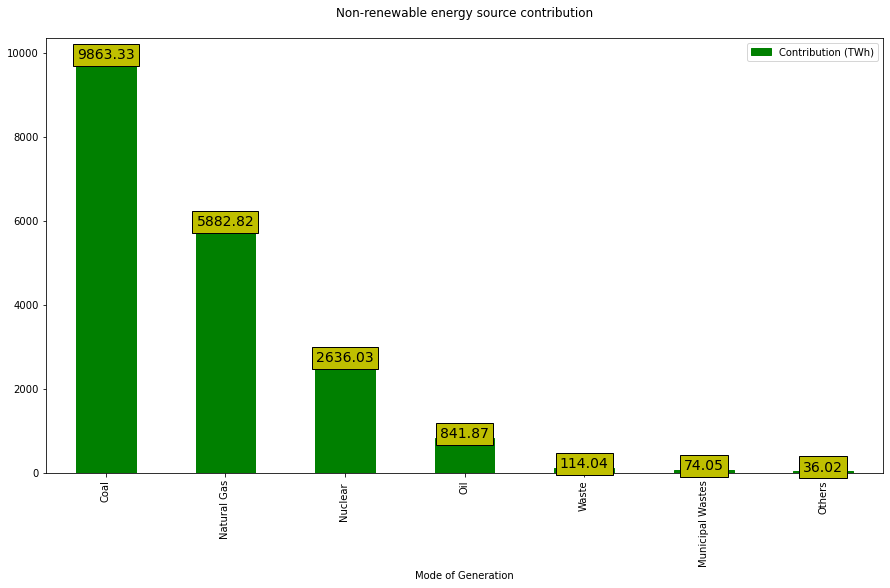

In [24]:
Non_Renew = Gen_non_renewable.plot.bar(figsize=(15, 8),color="g", edgecolor='g')
plt.title('Non-renewable energy source contribution\n')
for u, w in enumerate(Gen_non_renewable['Contribution (TWh)']):
    Non_Renew.text(u, w, str(w), bbox=dict(facecolor='y'), ha='center', fontsize=14)
plt.show()

### 5.2 Renewable Energy Sources

In [25]:
Gen_renewable.head()

,Mode of Generation,Contribution (TWh)
0,Hydro,9863.33
1,Wind,5882.82
2,Biofuel,2636.03
3,Solar PV,841.87
4,Geothermal,114.04


In [26]:
Gen_renewable.set_index('Mode of Generation', inplace=True) 

In [27]:
Gen_renewable.drop(labels='Total', inplace=True)

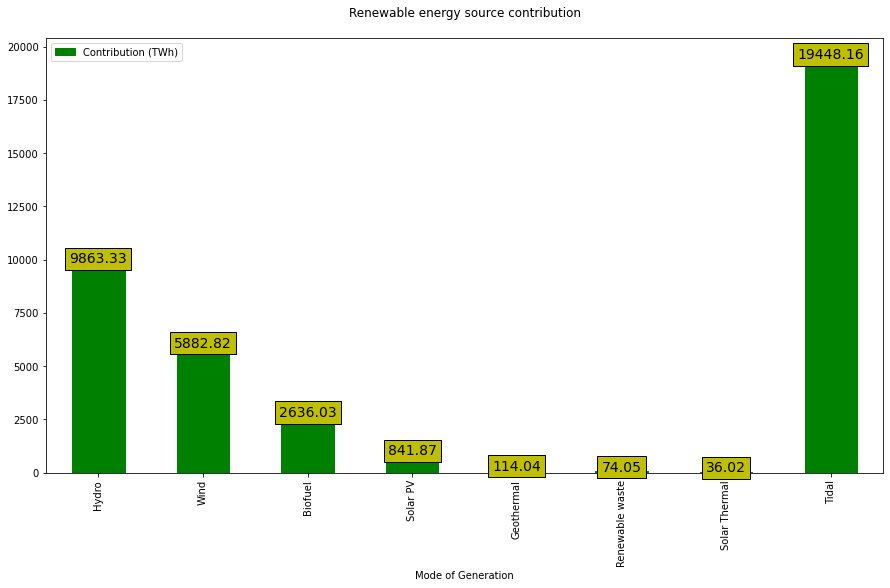

In [28]:
Renew = Gen_renewable.plot.bar(figsize=(15, 8),color="g", edgecolor='g')
plt.title('Renewable energy source contribution\n')
for u, w in enumerate(Gen_renewable['Contribution (TWh)']):
    Renew.text(u, w, str(w), bbox=dict(facecolor='y'), ha='center', fontsize=14)
plt.show()

# 6. Top Country in power generaation

In [29]:
TopCountries = pd.read_csv('top20CountriesPowerGeneration-Copy1.csv')

In [30]:
TopCountries.head()

,Country,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh),Total (TWh)
0,China,1189.84,295.02,79.43,0.125,1819.940
1,USA,315.62,277.91,58.95,18.960,758.619
2,Brazil,370.90,42.37,52.25,0.000,466.350
3,Canada,383.48,29.65,7.12,0.000,424.090
4,India,141.80,51.06,43.76,0.000,262.650


In [31]:
TopCountries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           20 non-null     object 
 1   Hydro(TWh)        20 non-null     float64
 2   Biofuel(TWh)      20 non-null     float64
 3   Solar PV (TWh)    20 non-null     float64
 4   Geothermal (TWh)  20 non-null     float64
 5   Total (TWh)       20 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


In [32]:
TopCountries.describe()

,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh),Total (TWh)
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,151.849500,51.149530,19.828000,2.667255,254.826935
std,273.122956,85.071233,23.726242,5.127413,413.203988
min,7.280000,0.000600,0.020000,0.000000,12.400000
25%,15.777500,2.277500,2.442500,0.000000,43.875150
50%,43.830000,18.685000,6.970000,0.062550,112.030000
75%,153.132500,50.872500,35.000000,3.170000,236.047500
max,1189.840000,295.020000,79.430000,18.960000,1819.940000


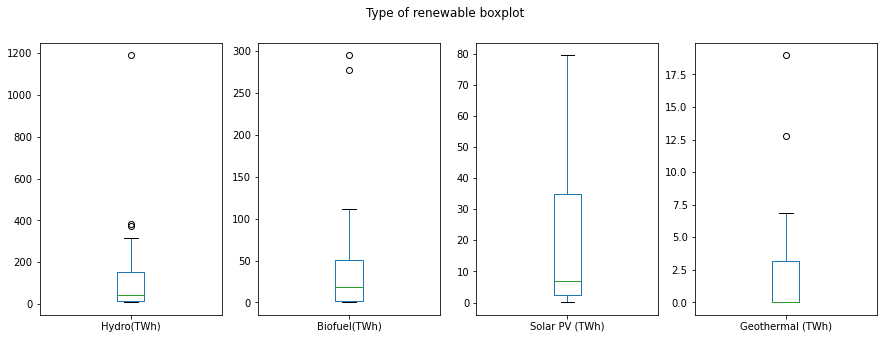

In [33]:
TC=TopCountries.drop(columns='Total (TWh)')
TC.plot.box(subplots=True, figsize=(15,5),title='Type of renewable boxplot')
plt.show()

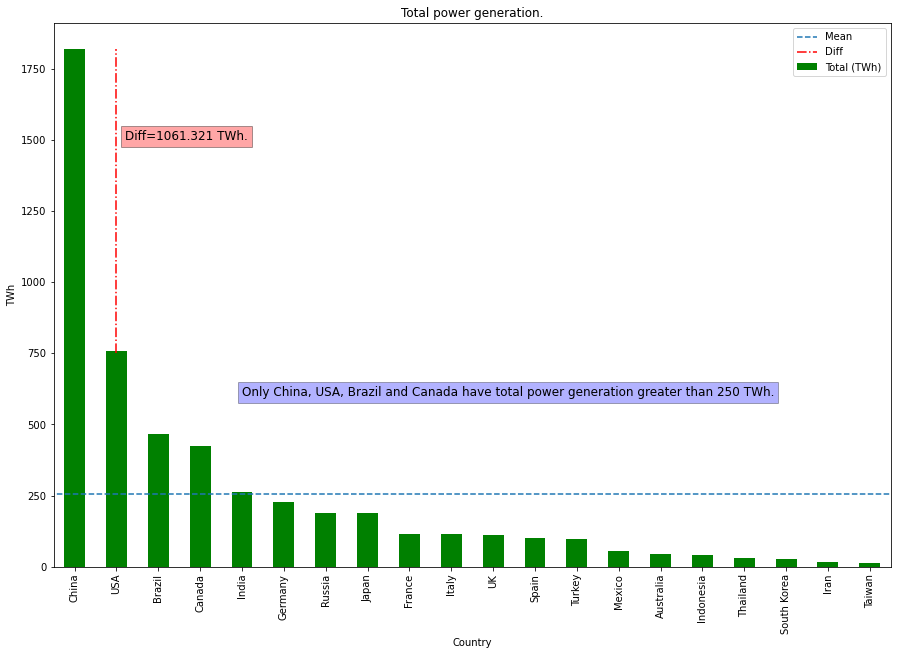

In [34]:
TCG=TopCountries.plot(x='Country', y='Total (TWh)',color="g", figsize=(15, 10), kind='bar')
plt.hlines(TopCountries['Total (TWh)'].mean(), -1, 20, linestyles='dashed', label='Mean')
plt.title('Total power generation.')
plt.ylabel('TWh')
TCG.text(4, 600, 'Only China, USA, Brazil and Canada have total power generation greater than 250 TWh.',
       bbox=dict(facecolor='b',alpha=0.3), fontsize=12)
TCG.vlines(1, 750, 1819, linestyles='dashdot',color="r", label='Diff')
TCG.text(1.2, 1500, f'Diff={1061.321} TWh.', bbox=dict(facecolor='red',alpha=0.35), fontsize=12)
plt.legend(loc='best')
plt.show()

## 7. Countrywise Renew energy sources

In [35]:
df = TopCountries.drop(columns=['Total (TWh)']).set_index('Country')
df

,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
Country,,,,
China,1189.84,295.0200,79.43,0.1250
USA,315.62,277.9100,58.95,18.9600
Brazil,370.90,42.3700,52.25,0.0000
Canada,383.48,29.6500,7.12,0.0000
India,141.80,51.0600,43.76,0.0000
Germany,24.17,111.5900,45.10,0.1600
Russia,187.13,0.1400,0.08,0.4300
Japan,90.67,7.6300,19.01,2.4400
France,70.13,28.5000,5.87,0.1300


In [36]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)

In [37]:
scaled_data.shape

(20, 4)

In [38]:
pca=PCA(n_components=0.95,whiten=True, random_state=0)

In [39]:
pca.fit(scaled_data)

PCA(n_components=0.95, random_state=0, whiten=True)

In [40]:
x_pca=pca.transform(scaled_data)

In [41]:
scaled_data.shape

(20, 4)

In [42]:
x_pca.shape

(20, 3)

In [43]:
PC = pd.DataFrame(pca.components_, index=['PC1','PC2','PC3'], columns=df.columns)
PC

,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
PC1,0.536681,0.597736,0.571116,0.168855
PC2,-0.303038,0.123096,-0.121157,0.937196
PC3,-0.736093,0.085735,0.650804,-0.165140


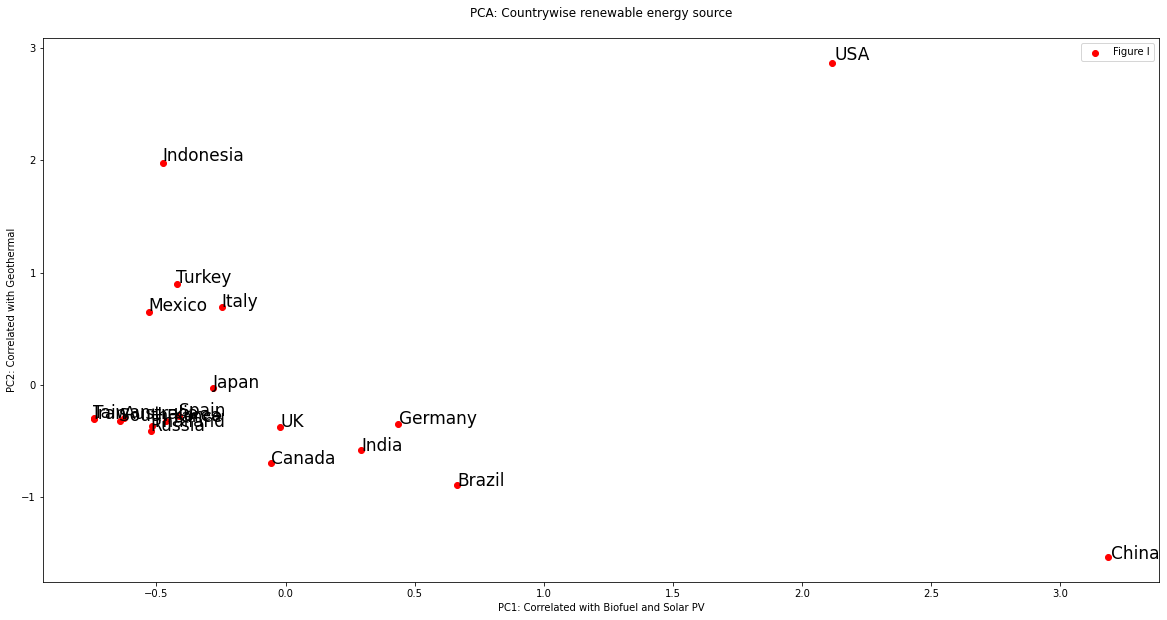

In [44]:
_,ax1 = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
ax1.scatter(x_pca[:, 0], x_pca[:, 1],color="r", label='Figure I')
for i, u in enumerate(df.index.tolist()):
    ax1.annotate(u, (x_pca[i, 0], x_pca[i, 1]), (x_pca[i, 0] + 0.05, x_pca[i, 1] - 0.01),fontsize=17,textcoords='offset points')

ax1.set_title('PCA: Countrywise renewable energy source\n')
ax1.set_ylabel('PC2: Correlated with Geothermal')
ax1.set_xlabel('PC1: Correlated with Biofuel and Solar PV')
ax1.legend(loc='best')
plt.show()

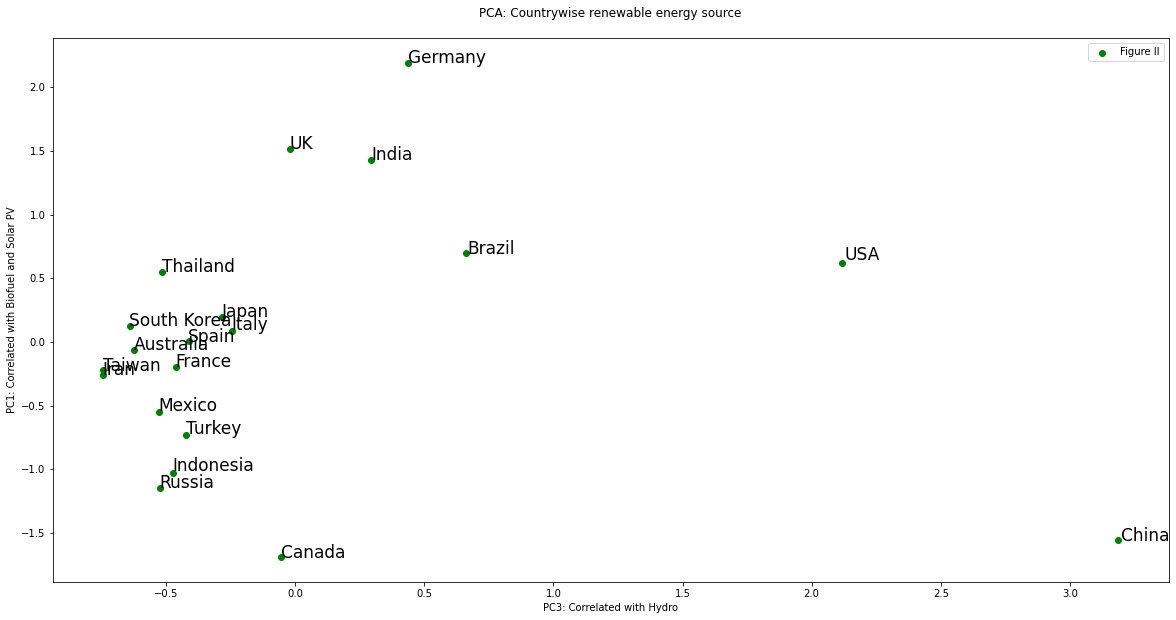

In [45]:
_, ax2 = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
ax2.scatter(x_pca[:, 0], x_pca[:, 2],color="g", label='Figure II')
for i, u in enumerate(df.index.tolist()):
    ax2.annotate(u, (x_pca[i, 0], x_pca[i, 2]), (x_pca[i, 0] + 0.05, x_pca[i, 1] - 0.01),fontsize=17,textcoords='offset points')

ax2.set_title('PCA: Countrywise renewable energy source\n')
ax2.set_ylabel('PC1: Correlated with Biofuel and Solar PV')
ax2.set_xlabel('PC3: Correlated with Hydro')
ax2.legend(loc='best')
plt.show()

# Growth in Renewable Energy Sources

In [46]:
Tot_Rene_Power = pd.read_csv('renewablePowerGeneration97-17-Copy1.csv')

In [47]:
Tot_Rene_Power.head()

,Year,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
0,1990,2191.67,3.88,0.09,36.42
1,1991,2268.63,4.19,0.10,37.39
2,1992,2267.16,4.63,0.12,39.30
3,1993,2397.67,5.61,0.15,40.23
4,1994,2419.73,7.31,0.17,41.05


In [48]:
Tot_Rene_Power.set_index('Year', inplace=True)

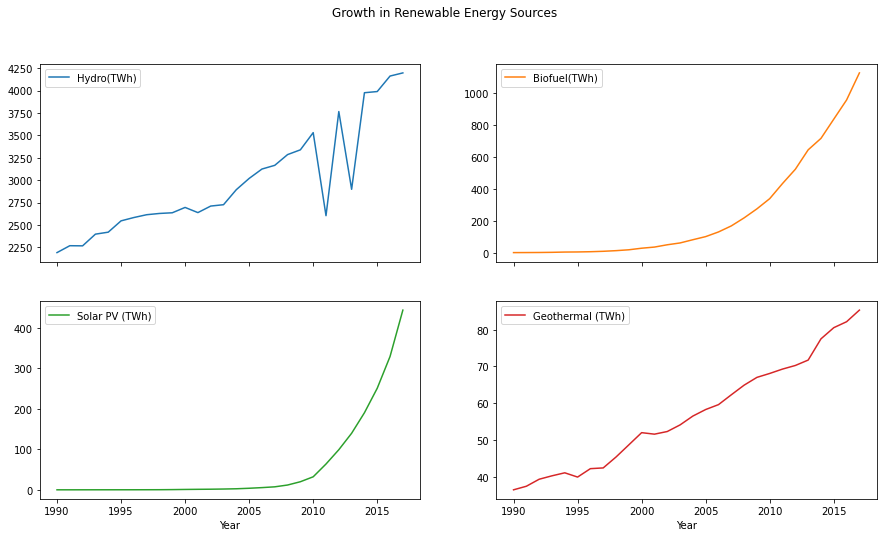

In [49]:
Tot_Rene_Power.plot(figsize=(15,8), title='Growth in Renewable Energy Sources', subplots=True, layout=(2,2))
plt.show()